### Este notebook contiene la primera fase del proyecto de análisis de datos, enfocada en el Análisis Exploratorio de Datos (EDA) de los conjuntos de datos de usuarios y restaurantes en EE. UU. El objetivo principal de este avance es comprender la estructura de los datos, identificar patrones iniciales, limpiar inconsistencias y preparar la información para fases posteriores.

In [3]:
#Importando librerias
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargando datos usuarios
df_usuarios_usa = pd.read_csv('C:/Users/alex_\Downloads/base_datos_restaurantes_USA_v2.csv')

In [5]:
# Cargando datos restaurantes
df_restaurantes_usa = pd.read_csv('C:/Users/alex_\Downloads/yelp_restaurants.csv')

## Analizando la información proveniente del DataFrame: Restaurantes_USA_v2 --> Usuarios
----

In [6]:
#analizando datos
print(df_usuarios_usa.head(5))

   id_persona    nombre apellido  edad     genero ciudad_residencia  \
0  2550327378   Jackson    Gomez  31.0  Masculino             Miami   
1  9446112038  Samantha     Soto  40.0   Femenino            Denver   
2  3098363243     Terry    Adams  62.0   Femenino            Denver   
3  4013002847     James  Shannon  41.0  Masculino            Boston   
4  7372911048     Susan    Jones  49.0   Femenino         San Diego   

  estrato_socioeconomico  frecuencia_visita  promedio_gasto_comida ocio  \
0                   Alto                  6                  67.51   Sí   
1                  Medio                  2                  44.92   Sí   
2                   Bajo                  2                   9.24   Sí   
3                   Alto                  5                  30.74   Sí   
4                   Bajo                  0                   0.00   No   

  consume_licor preferencias_alimenticias membresia_premium telefono_contacto  \
0            No               Vegetariano

In [7]:
print(df_usuarios_usa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

##### Se observan 30,000 datos de entrada y que el DataFrame se compone de 17 columnas: 2 de tipo float, 3 enteros y 12 columnas tipo object
----

##### Se opta por generar una copia para poder generar la manipulación de datos y se analizan las variables númericas

In [8]:
df_usuarios = df_usuarios_usa.copy()
df_usuarios.describe()

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,3.000000e+04,29899.000000,30000.000000,29855.000000,30000.000000
mean,5.504765e+09,49.665006,3.896133,32.603452,5389.755867
std,2.602799e+09,23.839550,2.741532,26.402601,4538.491728
min,1.000153e+09,-5.000000,-3.000000,0.000000,800.000000
25%,3.243617e+09,33.000000,2.000000,13.290000,1860.000000
50%,5.515865e+09,49.000000,4.000000,25.510000,3402.000000
75%,7.754426e+09,65.000000,5.000000,44.400000,7761.000000
max,9.999627e+09,300.000000,10.000000,149.970000,17999.000000


In [9]:
df_usuarios.isnull().sum().sort_values(ascending=False)

telefono_contacto            15166
correo_electronico           15072
preferencias_alimenticias     1403
promedio_gasto_comida          145
edad                           101
id_persona                       0
genero                           0
apellido                         0
nombre                           0
frecuencia_visita                0
estrato_socioeconomico           0
ciudad_residencia                0
ocio                             0
membresia_premium                0
consume_licor                    0
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [10]:
df_usuarios = df_usuarios.dropna(how='all')
np.shape(df_usuarios)

(30000, 17)

In [11]:
media_edad= df_usuarios.groupby(['estrato_socioeconomico','ciudad_residencia','genero'])['edad'].median()
media_edad


estrato_socioeconomico  ciudad_residencia  genero   
Alto                    Boston             Femenino     48.0
                                           Masculino    49.0
                        Chicago            Femenino     48.5
                                           Masculino    47.0
                        Dallas             Femenino     49.0
                                                        ... 
Muy Alto                Phoenix            Masculino    49.0
                        San Diego          Femenino     50.0
                                           Masculino    47.5
                        Seattle            Femenino     50.0
                                           Masculino    52.0
Name: edad, Length: 80, dtype: float64

In [12]:
for ciudad in df_usuarios['ciudad_residencia'].unique().tolist():
    print(f"La media de la edad en {ciudad} es: {df_usuarios[df_usuarios['ciudad_residencia'] == ciudad]['edad'].median()}")

La media de la edad en Miami es: 49.0
La media de la edad en Denver es: 49.0
La media de la edad en Boston es: 49.0
La media de la edad en San Diego es: 49.0
La media de la edad en Dallas es: 49.0
La media de la edad en NYC es: 49.0
La media de la edad en Seattle es: 50.0
La media de la edad en Chicago es: 49.0
La media de la edad en Houston es: 49.0
La media de la edad en Phoenix es: 48.0


##### Tomando en consideración la edad media de los ciudadanos de EU, se indica que el promedio se encuentra dentro de los 79.3 años, por lo que se toma la cifra redondeada hacía arriba para definir dentro de los rangos normalizados y se crea una función que elimine los valores fuera del rango 18-80

In [13]:
#convertimos los valores fuera del rango establecido en valores vacíos para trabajar con ellos más adelante
df_usuarios['edad'] = df_usuarios['edad'].apply(lambda x: x if 18 <= x <= 80 else np.nan)
df_usuarios.isnull().sum().sort_values(ascending=False)

telefono_contacto            15166
correo_electronico           15072
preferencias_alimenticias     1403
edad                           308
promedio_gasto_comida          145
id_persona                       0
genero                           0
apellido                         0
nombre                           0
frecuencia_visita                0
estrato_socioeconomico           0
ciudad_residencia                0
ocio                             0
membresia_premium                0
consume_licor                    0
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [14]:
# Reemplazamos los valores vacíos en edad de comida con el promedio de acuerdo a la ciudad de residencia, estrato socioeconomico y genero
for c in df_usuarios ['ciudad_residencia'].unique().tolist():
    for e in df_usuarios['estrato_socioeconomico'].unique().tolist():
        for g in df_usuarios['genero'].unique().tolist():
            df_usuarios['edad'] = df_usuarios['edad'].fillna(df_usuarios[(df_usuarios['ciudad_residencia'] == c)&(df_usuarios['estrato_socioeconomico'] == e)&(df_usuarios['genero'] == g)]['edad'].median())

In [15]:
df_usuarios['edad'].isnull().sum()

np.int64(0)

In [16]:
df_usuarios.isnull().sum().sort_values(ascending=False)

telefono_contacto            15166
correo_electronico           15072
preferencias_alimenticias     1403
promedio_gasto_comida          145
id_persona                       0
genero                           0
nombre                           0
edad                             0
apellido                         0
frecuencia_visita                0
estrato_socioeconomico           0
ciudad_residencia                0
ocio                             0
membresia_premium                0
consume_licor                    0
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [17]:
# Reemplazamos los valores vacíos en promedio gasto de comida con el promedio de acuerdo a la ciudad de residencia, estrato socioeconomico y genero
for c in df_usuarios ['ciudad_residencia'].unique().tolist():
    for e in df_usuarios['estrato_socioeconomico'].unique().tolist():
        for g in df_usuarios['genero'].unique().tolist():
            df_usuarios['promedio_gasto_comida'] = df_usuarios['promedio_gasto_comida'].fillna(df_usuarios[(df_usuarios['ciudad_residencia'] == c)&(df_usuarios['estrato_socioeconomico'] == e)&(df_usuarios['genero'] == g)]['promedio_gasto_comida'].mean())

In [18]:
df_usuarios.isnull().sum().sort_values(ascending=False)

telefono_contacto            15166
correo_electronico           15072
preferencias_alimenticias     1403
id_persona                       0
nombre                           0
ciudad_residencia                0
apellido                         0
edad                             0
genero                           0
promedio_gasto_comida            0
frecuencia_visita                0
estrato_socioeconomico           0
ocio                             0
membresia_premium                0
consume_licor                    0
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [19]:
# Reemplazamos los valores vacíos en la columna preferencias alimenticias con la moda de acuerdo a la ciudad de residencia, estrato socioeconomico y genero
df_usuarios['preferencias_alimenticias'] = df_usuarios['preferencias_alimenticias'].fillna(df_usuarios.groupby(['ciudad_residencia','estrato_socioeconomico','genero'])['preferencias_alimenticias'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [20]:
df_usuarios.isnull().sum().sort_values(ascending=False)

telefono_contacto            15166
correo_electronico           15072
id_persona                       0
nombre                           0
apellido                         0
ciudad_residencia                0
estrato_socioeconomico           0
edad                             0
genero                           0
promedio_gasto_comida            0
frecuencia_visita                0
ocio                             0
consume_licor                    0
membresia_premium                0
preferencias_alimenticias        0
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [21]:
## Eliminamos registros del data set cuya frecuencia de visita y gasto de comida es igual a 0 ya que resultan datos no relevantes para el análisis y pueden alterar los resultados
df_usuarios.drop(df_usuarios[(df_usuarios['frecuencia_visita'] == 0) & (df_usuarios['promedio_gasto_comida'] == 0)].index,inplace=True)

In [22]:
# Filtramos por ciudad para obtener los resultados a tratar con la importación de los datos a tráves de la API
df_usuarios[df_usuarios['ciudad_residencia'] == 'Miami']

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
16,6139475525,Andrew,Soto,18.0,Masculino,Miami,Muy Alto,9,26.60,Sí,Sí,Vegetariano,Sí,2859380942,ssteele@example.net,App,13452
37,5358661821,Elizabeth,Brown,79.0,Femenino,Miami,Muy Alto,6,28.43,No,No,Mariscos,Sí,(464)992-9070x38394,NaN,Efectivo,14072
45,8593345998,Robert,Wilson,76.0,Masculino,Miami,Alto,5,43.00,Sí,No,Mariscos,Sí,NaN,NaN,App,6528
47,6170452916,Bruce,Young,55.0,Masculino,Miami,Muy Alto,5,119.85,Sí,No,Carnes,Sí,NaN,ltran@example.com,Efectivo,15844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,2238067088,Kevin,Taylor,45.0,Masculino,Miami,Medio,5,35.35,Sí,No,Vegetariano,Sí,+1-748-240-5443,jerrychavez@example.com,Efectivo,3174
29957,1161504159,Rachael,Martinez,58.0,Femenino,Miami,Medio,5,19.10,No,Sí,Pescado,No,7756404909,wmalone@example.net,Efectivo,2157
29958,9452988778,William,Peters,50.0,Masculino,Miami,Bajo,2,14.65,Sí,Sí,Mariscos,No,NaN,NaN,Tarjeta,829
29985,8301681475,Gloria,Evans,38.0,Femenino,Miami,Alto,5,16.84,Sí,No,Carnes,Sí,950-647-8528x2958,marywilliams@example.net,Tarjeta,4853


El primer data frame Restaurante_USA_v2 ha sido tratado para poder obtener datos limpios y ahora se va a efectuar la misma limpieza dentro del segundo data frame

In [23]:
genero_usuarios = df_usuarios.groupby('genero')['id_persona'].count()
genero_usuarios

genero
Femenino     14283
Masculino    14254
Name: id_persona, dtype: int64

In [24]:
frecuencia_cal =df_usuarios.groupby('estrato_socioeconomico')['frecuencia_visita'].mean()
frecuencia_cal

estrato_socioeconomico
Alto        4.594158
Bajo        1.675181
Medio       3.148418
Muy Alto    6.963660
Name: frecuencia_visita, dtype: float64

In [25]:
gasto_cal =df_usuarios.groupby(['estrato_socioeconomico'])['promedio_gasto_comida'].mean()
gasto_cal

estrato_socioeconomico
Alto        38.152283
Bajo        11.782087
Medio       24.324215
Muy Alto    64.316993
Name: promedio_gasto_comida, dtype: float64

In [26]:
estrato_usuarios= df_usuarios.groupby(['estrato_socioeconomico'])['id_persona'].count()
estrato_usuarios

estrato_socioeconomico
Alto        9038
Bajo        4698
Medio       9325
Muy Alto    5476
Name: id_persona, dtype: int64

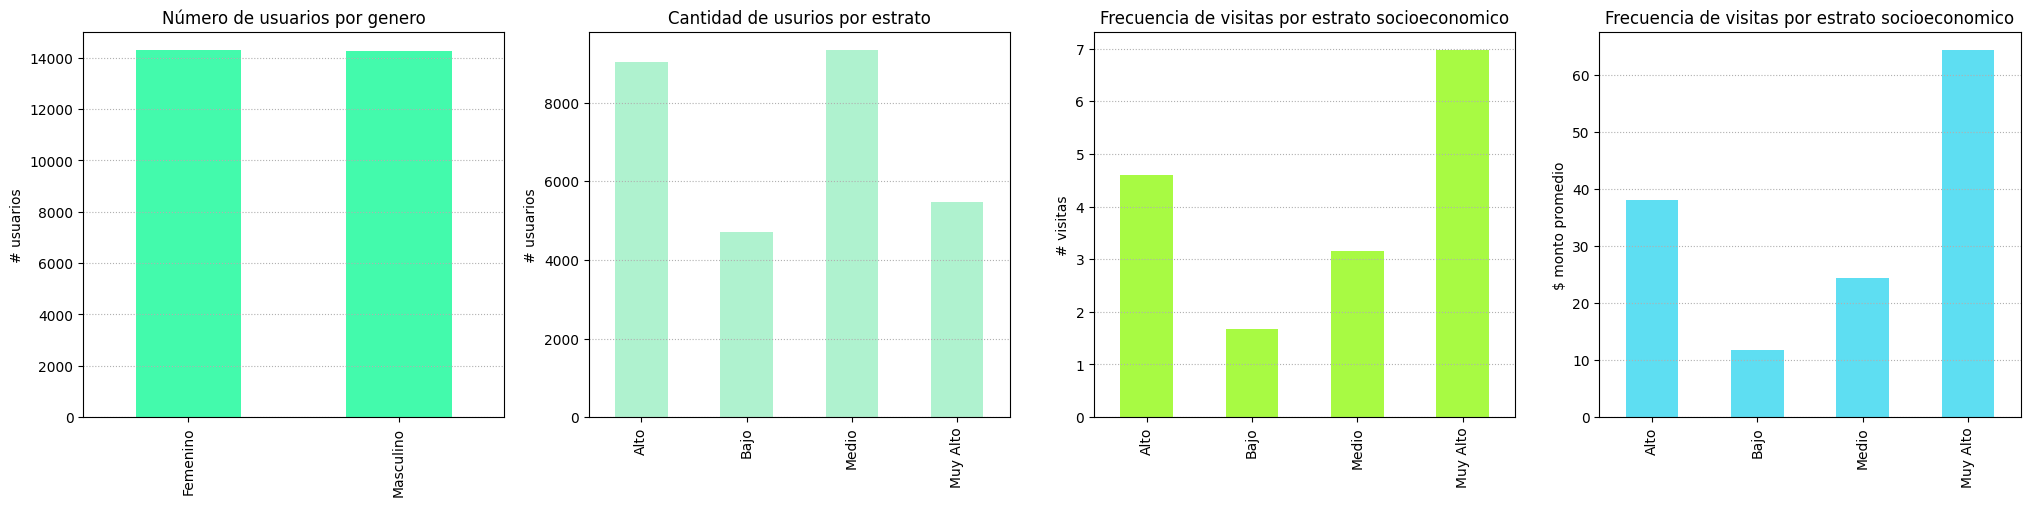

In [27]:
#graficos representativos de los datos obtenidos del dataset limpio
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))
#cantidad de usuarios por genero
genero_usuarios.plot(kind='bar', color='#43FAAC', ax=ax1)
ax1.set_title('Número de usuarios por genero')
ax1.set_xlabel('')
ax1.set_ylabel('# usuarios')
ax1.grid(axis='y', linestyle=':')
#usuarios por estrato
estrato_usuarios.plot(kind='bar', color='#AFF2CF', ax=ax2)
ax2.set_title('Cantidad de usurios por estrato')
ax2.set_xlabel('')
ax2.set_ylabel('# usuarios')
ax2.grid(axis='y', linestyle=':')
#frecuencia de visitas por estrato
frecuencia_cal.plot(kind='bar', color='#A8FA43', ax=ax3)
ax3.set_title('Frecuencia de visitas por estrato socioeconomico')
ax3.set_xlabel('')
ax3.set_ylabel('# visitas')
ax3.grid(axis='y', linestyle=':')
# gasto promedio por estrato
gasto_cal.plot(kind='bar', color='#5EDEF2', ax=ax4)
ax4.set_title('Frecuencia de visitas por estrato socioeconomico')
ax4.set_xlabel('')
ax4.set_ylabel('$ monto promedio')
ax4.grid(axis='y', linestyle=':')
plt.show()

A partir de la información visualizada en estos graficos podemos obtener esta información: 

- La cantidad de usuarios que se tienen por genero son practicamente iguales o muy cercanos
- Del total de clientes en la base de datos la mayor cantidad de usuarios se encuentran en los estratos medio y alto
- Los usuarios que registran el mayor numero de visitas están en los estratos alto y muy alto
- Los usuarios que tienen un mayo gasto promedio son aquellos que se encuentran en los estratos alto y muy alto

Como una conclusión previa valdría la pena enfocar la campaña prioritariamente en el universo de usuarios que se encuentran en los estratos medio y alto ya que son la mayor cantidad de usuarios el número de visitas y gasto promedio es considerable y podrían representar el mayor porcentaje de conversión.

In [28]:
#almacenamos en un CSV los resultados después del procesamiento
df_usuarios.to_csv('usuarios_datos_limpios')